<a href="https://colab.research.google.com/github/namanphy/EVA5/blob/main/S7/cifar10_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting up code

#### Cloning the required [repository](https://github.com/namanphy/EVA5/) and adding the path to the code directory.

In [1]:
! git clone https://github.com/namanphy/EVA5.git

import sys
sys.path.append('EVA5/S7/')

fatal: destination path 'EVA5' already exists and is not an empty directory.


#### Importing the required modules and files

In [18]:
import cuda
from data.dataset import cifar10_dataset, transformations
from data.dataloader import data_loader
from model.utils import set_seed, plot_metric, identify_misclassification, plot_results
from model.model import Net, model_summary
from model.functions import sgd_optimizer, cross_entropy_loss
from model.trainer import Trainer

In [9]:
set_seed(123)
use_cuda = cuda.cuda_is_available()
# device = cuda.enable_cuda()

## Making the data ready

In [4]:
transforms = transformations(augmentation=False)

train_set = cifar10_dataset('../data', train=True, transform=transforms)
test_set = cifar10_dataset('../data', train=False, transform=transforms)

train_loader = data_loader(train_set, 64, use_cuda, num_workers=4)
test_loader = data_loader(test_set, 64, use_cuda, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


#### Printing the shape of one image

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print('shape of one image - ', images[0].shape)

shape of one image -  torch.Size([3, 32, 32])


## Import model architecture and set up training

#### model setup

In [ ]:
model = Net()
model_summary(model, input_size=(3, 32, 32))

#### Training model

In [15]:
results = {}  # empty dict to store results

criterion = cross_entropy_loss()
optimizer = sgd_optimizer(model, lr=0.01, l2_factor=0)

trainer = Trainer(model, optimizer, criterion, train_loader, valid_data_loader=test_loader, lr_scheduler=None, l1_loss=False)

results['iter_1'] = trainer.train(45)
trainer.save('cifar10_model')

  0%|          | 0/782 [00:00<?, ?it/s]

------------ EPOCH 1 -------------


EVA5/S7/model/model.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.8767170310020447 Batch_id=781 Accuracy=53.92: 100%|██████████| 782/782 [00:18<00:00, 42.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9441, Accuracy: 6603/10000 (66%)

------------ EPOCH 2 -------------


Loss=0.9117531180381775 Batch_id=781 Accuracy=69.68: 100%|██████████| 782/782 [00:18<00:00, 42.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7369, Accuracy: 7419/10000 (74%)

------------ EPOCH 3 -------------


Loss=0.7779597640037537 Batch_id=781 Accuracy=75.23: 100%|██████████| 782/782 [00:18<00:00, 42.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6733, Accuracy: 7670/10000 (77%)

------------ EPOCH 4 -------------


Loss=0.7241187691688538 Batch_id=781 Accuracy=78.18: 100%|██████████| 782/782 [00:18<00:00, 42.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6604, Accuracy: 7749/10000 (77%)

------------ EPOCH 5 -------------


Loss=1.0075989961624146 Batch_id=781 Accuracy=80.57: 100%|██████████| 782/782 [00:18<00:00, 42.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6013, Accuracy: 7911/10000 (79%)

------------ EPOCH 6 -------------


Loss=0.5245712995529175 Batch_id=781 Accuracy=82.23: 100%|██████████| 782/782 [00:18<00:00, 42.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5984, Accuracy: 7933/10000 (79%)

------------ EPOCH 7 -------------


Loss=0.5619614720344543 Batch_id=781 Accuracy=83.74: 100%|██████████| 782/782 [00:18<00:00, 42.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6276, Accuracy: 7870/10000 (79%)

------------ EPOCH 8 -------------


Loss=1.3634679317474365 Batch_id=781 Accuracy=84.85: 100%|██████████| 782/782 [00:18<00:00, 42.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5366, Accuracy: 8163/10000 (82%)

------------ EPOCH 9 -------------


Loss=0.4751830995082855 Batch_id=781 Accuracy=86.02: 100%|██████████| 782/782 [00:18<00:00, 43.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5444, Accuracy: 8136/10000 (81%)

------------ EPOCH 10 -------------


Loss=0.27595022320747375 Batch_id=781 Accuracy=87.21: 100%|██████████| 782/782 [00:18<00:00, 42.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5594, Accuracy: 8087/10000 (81%)

------------ EPOCH 11 -------------


Loss=1.2730647325515747 Batch_id=781 Accuracy=88.05: 100%|██████████| 782/782 [00:18<00:00, 42.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5502, Accuracy: 8129/10000 (81%)

------------ EPOCH 12 -------------


Loss=0.8314321041107178 Batch_id=781 Accuracy=88.78: 100%|██████████| 782/782 [00:18<00:00, 42.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5469, Accuracy: 8157/10000 (82%)

------------ EPOCH 13 -------------


Loss=0.2527216076850891 Batch_id=781 Accuracy=89.41: 100%|██████████| 782/782 [00:18<00:00, 42.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5663, Accuracy: 8106/10000 (81%)

------------ EPOCH 14 -------------


Loss=0.7587021589279175 Batch_id=781 Accuracy=90.20: 100%|██████████| 782/782 [00:18<00:00, 41.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5624, Accuracy: 8089/10000 (81%)

------------ EPOCH 15 -------------


Loss=0.6543857455253601 Batch_id=781 Accuracy=90.67: 100%|██████████| 782/782 [00:18<00:00, 42.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5419, Accuracy: 8210/10000 (82%)

------------ EPOCH 16 -------------


Loss=0.569719135761261 Batch_id=781 Accuracy=91.12: 100%|██████████| 782/782 [00:18<00:00, 42.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5695, Accuracy: 8157/10000 (82%)

------------ EPOCH 17 -------------


Loss=0.2996140718460083 Batch_id=781 Accuracy=91.77: 100%|██████████| 782/782 [00:18<00:00, 42.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5592, Accuracy: 8161/10000 (82%)

------------ EPOCH 18 -------------


Loss=0.36242741346359253 Batch_id=781 Accuracy=92.07: 100%|██████████| 782/782 [00:18<00:00, 42.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5684, Accuracy: 8158/10000 (82%)

------------ EPOCH 19 -------------


Loss=0.7347495555877686 Batch_id=781 Accuracy=92.67: 100%|██████████| 782/782 [00:18<00:00, 41.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5459, Accuracy: 8237/10000 (82%)

------------ EPOCH 20 -------------


Loss=0.5911722779273987 Batch_id=781 Accuracy=93.18: 100%|██████████| 782/782 [00:18<00:00, 42.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5758, Accuracy: 8141/10000 (81%)

------------ EPOCH 21 -------------


Loss=0.7059405446052551 Batch_id=781 Accuracy=93.29: 100%|██████████| 782/782 [00:18<00:00, 42.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5862, Accuracy: 8139/10000 (81%)

------------ EPOCH 22 -------------


Loss=0.3137646019458771 Batch_id=781 Accuracy=93.62: 100%|██████████| 782/782 [00:18<00:00, 41.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5834, Accuracy: 8112/10000 (81%)

------------ EPOCH 23 -------------


Loss=0.6179073452949524 Batch_id=781 Accuracy=93.68: 100%|██████████| 782/782 [00:18<00:00, 42.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6120, Accuracy: 8053/10000 (81%)

------------ EPOCH 24 -------------


Loss=0.273798406124115 Batch_id=781 Accuracy=94.05: 100%|██████████| 782/782 [00:18<00:00, 42.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6073, Accuracy: 8082/10000 (81%)

------------ EPOCH 25 -------------


Loss=0.7131415009498596 Batch_id=781 Accuracy=94.45: 100%|██████████| 782/782 [00:18<00:00, 42.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5837, Accuracy: 8146/10000 (81%)

------------ EPOCH 26 -------------


Loss=0.38883301615715027 Batch_id=781 Accuracy=94.51: 100%|██████████| 782/782 [00:18<00:00, 41.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5706, Accuracy: 8172/10000 (82%)

------------ EPOCH 27 -------------


Loss=0.2825273871421814 Batch_id=781 Accuracy=94.88: 100%|██████████| 782/782 [00:18<00:00, 42.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5982, Accuracy: 8101/10000 (81%)

------------ EPOCH 28 -------------


Loss=0.6927497386932373 Batch_id=781 Accuracy=95.15: 100%|██████████| 782/782 [00:18<00:00, 42.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5852, Accuracy: 8103/10000 (81%)

------------ EPOCH 29 -------------


Loss=0.3765169680118561 Batch_id=781 Accuracy=95.41: 100%|██████████| 782/782 [00:18<00:00, 41.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5746, Accuracy: 8132/10000 (81%)

------------ EPOCH 30 -------------


Loss=0.6408783197402954 Batch_id=781 Accuracy=95.40: 100%|██████████| 782/782 [00:18<00:00, 42.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6343, Accuracy: 7989/10000 (80%)

------------ EPOCH 31 -------------


Loss=0.5406581163406372 Batch_id=781 Accuracy=95.61: 100%|██████████| 782/782 [00:18<00:00, 41.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6174, Accuracy: 8017/10000 (80%)

------------ EPOCH 32 -------------


Loss=0.2569969892501831 Batch_id=781 Accuracy=95.51: 100%|██████████| 782/782 [00:18<00:00, 42.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6399, Accuracy: 8049/10000 (80%)

------------ EPOCH 33 -------------


Loss=0.5949563980102539 Batch_id=781 Accuracy=96.04: 100%|██████████| 782/782 [00:18<00:00, 42.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5733, Accuracy: 8187/10000 (82%)

------------ EPOCH 34 -------------


Loss=0.3938910961151123 Batch_id=781 Accuracy=95.89: 100%|██████████| 782/782 [00:18<00:00, 42.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5796, Accuracy: 8143/10000 (81%)

------------ EPOCH 35 -------------


Loss=0.5939642190933228 Batch_id=781 Accuracy=96.08: 100%|██████████| 782/782 [00:18<00:00, 42.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5738, Accuracy: 8178/10000 (82%)

------------ EPOCH 36 -------------


Loss=0.3151371479034424 Batch_id=781 Accuracy=96.03: 100%|██████████| 782/782 [00:18<00:00, 42.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6011, Accuracy: 8116/10000 (81%)

------------ EPOCH 37 -------------


Loss=0.33640387654304504 Batch_id=781 Accuracy=96.22: 100%|██████████| 782/782 [00:18<00:00, 42.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5914, Accuracy: 8091/10000 (81%)

------------ EPOCH 38 -------------


Loss=0.4828687906265259 Batch_id=781 Accuracy=96.44: 100%|██████████| 782/782 [00:18<00:00, 42.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5833, Accuracy: 8134/10000 (81%)

------------ EPOCH 39 -------------


Loss=0.3743773102760315 Batch_id=781 Accuracy=96.51: 100%|██████████| 782/782 [00:18<00:00, 42.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5911, Accuracy: 8123/10000 (81%)

------------ EPOCH 40 -------------


Loss=0.48180001974105835 Batch_id=781 Accuracy=96.75: 100%|██████████| 782/782 [00:18<00:00, 42.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5774, Accuracy: 8140/10000 (81%)

------------ EPOCH 41 -------------


Loss=0.7627575397491455 Batch_id=781 Accuracy=96.78: 100%|██████████| 782/782 [00:18<00:00, 42.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5974, Accuracy: 8102/10000 (81%)

------------ EPOCH 42 -------------


Loss=0.8951719403266907 Batch_id=781 Accuracy=96.78: 100%|██████████| 782/782 [00:18<00:00, 42.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5919, Accuracy: 8096/10000 (81%)

------------ EPOCH 43 -------------


Loss=0.5101728439331055 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [00:18<00:00, 42.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5758, Accuracy: 8156/10000 (82%)

------------ EPOCH 44 -------------


Loss=0.6425125002861023 Batch_id=781 Accuracy=96.84: 100%|██████████| 782/782 [00:18<00:00, 42.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5896, Accuracy: 8080/10000 (81%)

------------ EPOCH 45 -------------


Loss=0.4894356429576874 Batch_id=781 Accuracy=97.23: 100%|██████████| 782/782 [00:18<00:00, 42.57it/s]



Test set: Average loss: 0.5885, Accuracy: 8138/10000 (81%)



## Analyzing results 

In [28]:
from statistics import mean
print('Train accuracy - ',  mean(results['iter_1']['train_acc']))
print('Test accuracy - ',  mean(results['iter_1']['test_acc']))

Train accuracy -  90.65377777777778
Test accuracy -  80.41444444444444


It is clearly visible that our model is overfitting here. Though in last some epochs the `test_accuracy` was more then 81% but the model is not beating above that mark.

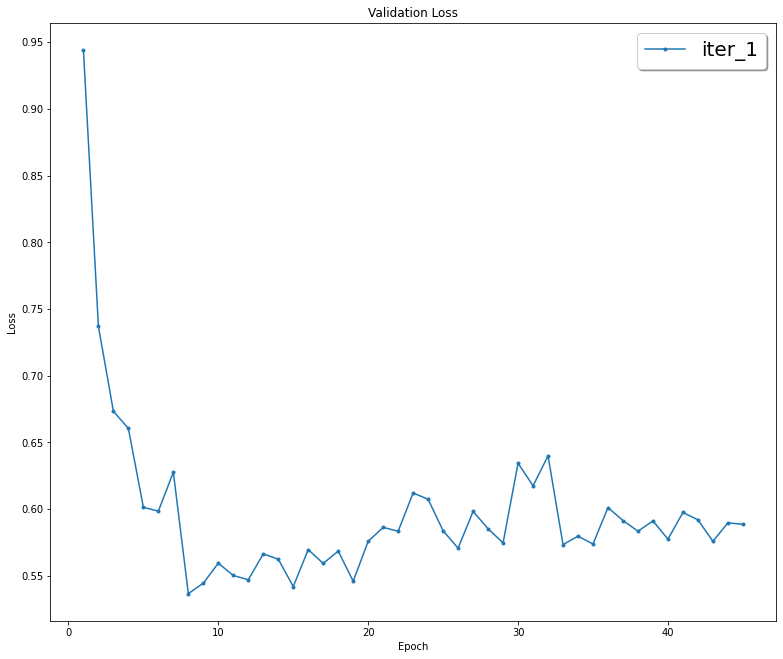

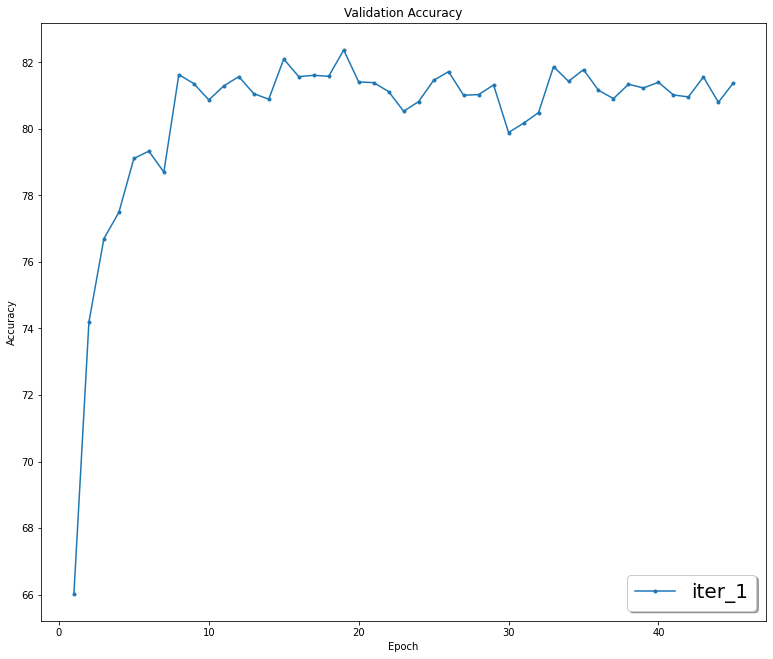

In [19]:
# Validation loss
losses = {}
accuracies = {}
for k, v in results.items():
    losses[k] = v['test_loss']
    accuracies[k] = v['test_acc']
  
plot_metric(losses, 'Loss')
plot_metric(accuracies, 'Accuracy')

EVA5/S7/model/model.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


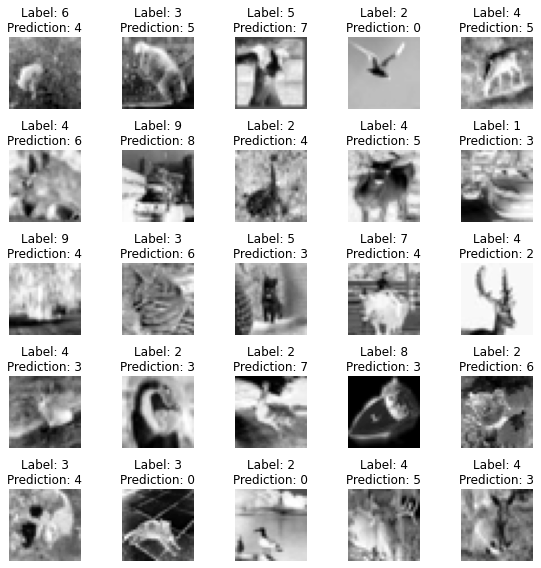

In [20]:
path_to_model = '/content/cifar10_model.pt'
incorrect_samples = identify_misclassification(Net(), path_to_model, test_loader)

plot_results(incorrect_samples)